In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('framingham.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [4]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


Assumption: "education" feature is difficult to interpret so I omit it in this research.

In [5]:
df.drop(columns=['education'], inplace=True)

In [6]:
numerical = [
    'age', 'cigsPerDay', 'totChol', 'sysBP', 
    'diaBP', 'BMI', 'heartRate', 'glucose'
]

In [7]:
categorical = [
    'male', 'currentSmoker', 'BPMeds', 
    'prevalentStroke', 'prevalentHyp', 'diabetes'
]

#### Check and fill NaN

##### Numerical

In [8]:
df.isna().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

From the above it is clear that numerical columns "cigsPerDay", "totChol", "BMI", "heartRate" and "glucose" has NaN values. It order to handle this let's explore their corresponding  distributions.
I will use univariate visualization in order to understand these features.

In [9]:
df[numerical].describe()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,4238.000000,4209.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000
mean,49.584946,9.003089,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753
std,8.572160,11.920094,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998
min,32.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000
25%,42.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000
50%,49.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000
75%,56.000000,20.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000
max,70.000000,70.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000


Plot histograms with kernel density estimate to smooth the histogram, providing complementary information about the shape of the distribution. Plot box plots as well to understand outliers.

<AxesSubplot:xlabel='BMI'>

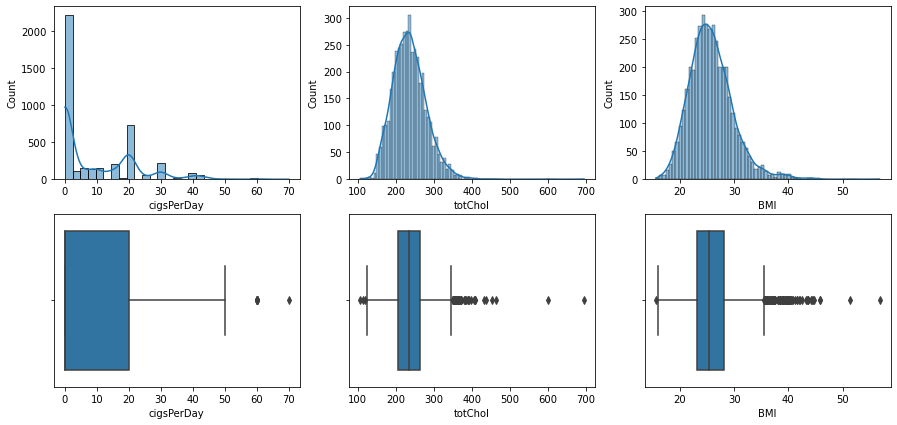

In [10]:
_, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 7))
sns.histplot(data=df, x="cigsPerDay", kde=True, ax=axes[0, 0])
sns.histplot(data=df, x="totChol", kde=True, ax=axes[0, 1])
sns.histplot(data=df, x="BMI", kde=True, ax=axes[0, 2])
sns.boxplot(data=df, x="cigsPerDay", ax=axes[1, 0])
sns.boxplot(data=df, x="totChol", ax=axes[1, 1])
sns.boxplot(data=df, x="BMI", ax=axes[1, 2])

<AxesSubplot:xlabel='glucose'>

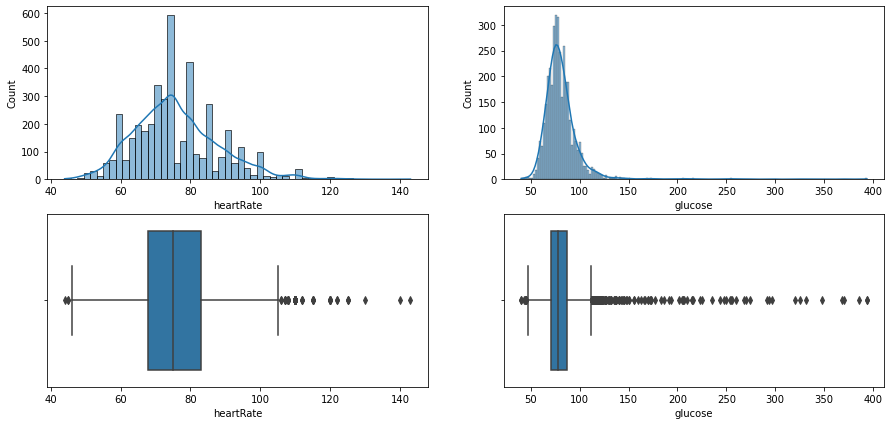

In [11]:
_, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 7))
sns.histplot(data=df, x="heartRate", kde=True, ax=axes[0, 0])
sns.histplot(data=df, x="glucose", kde=True, ax=axes[0, 1])
sns.boxplot(data=df, x="heartRate", ax=axes[1, 0])
sns.boxplot(data=df, x="glucose", ax=axes[1, 1])

In [12]:
features_with_nan = ['cigsPerDay', 'totChol', 'BMI', 'heartRate', 'glucose']
for feature in features_with_nan:
    perc_99 = np.percentile(df[feature].values[~np.isnan(df[feature].values)], 99)
    print(f'{feature} 99% percentile is {perc_99:.1f}')

cigsPerDay 99% percentile is 43.0
totChol 99% percentile is 354.1
BMI 99% percentile is 39.0
heartRate 99% percentile is 110.0
glucose 99% percentile is 175.0


"cigsPerDay" feature distribution is skewed to the right.
"totChol", "BMI" and "glucose" features shows distribution skewed to the right due to outliers. Without outliers they have normal distribution.
"heartRate" feature distribution close to normal.
1. "cigsPerDay" feature NaN values could be filled with 0
2. "totChol", "BMI", "heartRate" and "glucose" features NaN values could be filled with respective median values

In [13]:
df['cigsPerDay'] = df['cigsPerDay'].fillna(0)
df['totChol'].fillna(value=df['totChol'].median(), inplace=True)
df['BMI'].fillna(value=df['BMI'].median(), inplace=True)
df['heartRate'].fillna(value=df['heartRate'].median(), inplace=True)
df['glucose'].fillna(value=df['glucose'].median(), inplace=True)

##### Categorical

<AxesSubplot:xlabel='BPMeds', ylabel='count'>

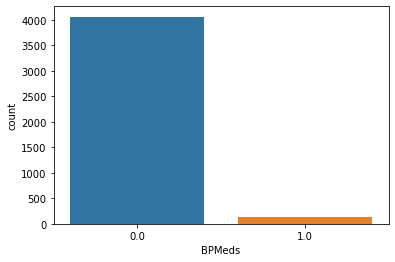

In [14]:
sns.countplot(x='BPMeds', data=df)

From plot above it can be concluded that "BPMeds" feature NaN values could be replaced with 0.0 values.

In [15]:
df['BPMeds'].fillna(0.0, inplace=True)

In [16]:
df.isna().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

### EDA

In [20]:
df.TenYearCHD.value_counts()

0    3594
1     644
Name: TenYearCHD, dtype: int64

In [22]:
df.TenYearCHD.value_counts(normalize=True)

0    0.848042
1    0.151958
Name: TenYearCHD, dtype: float64

Dataset is highly unbalanced. 3594 people (or 85%) out of 4238 are not having 10 year risk of coronary heart disease CHD.

In [17]:
df[categorical].nunique()

male               2
currentSmoker      2
BPMeds             2
prevalentStroke    2
prevalentHyp       2
diabetes           2
dtype: int64

In [ ]:
df[numerical].hist(bins=20, figsize=(15, 10))

In [ ]:
df[numerical].plot(
    kind="density", subplots=True, layout=(2, 4), sharex=False, figsize=(20, 8)
);

1. "cigsPerDay" feature has 

In [ ]:
_, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 4))


Split dataset into 60% train / 20% val / 20% test datasets.

In [ ]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=13)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=13)

In [ ]:
len(df_train), len(df_val), len(df_test)

In [ ]:
df.isna().sum()